In [42]:
import pandas as pd
import seaborn as sns
df=pd.read_csv('/content/pima-indians-diabetes.csv')
df.info

<bound method DataFrame.info of      A1   A2  A3  A4   A5    A6     A7  A8  Target
0     6  148  72  35    0  33.6  0.627  50       1
1     1   85  66  29    0  26.6  0.351  31       0
2     8  183  64   0    0  23.3  0.672  32       1
3     1   89  66  23   94  28.1  0.167  21       0
4     0  137  40  35  168  43.1  2.288  33       1
..   ..  ...  ..  ..  ...   ...    ...  ..     ...
763  10  101  76  48  180  32.9  0.171  63       0
764   2  122  70  27    0  36.8  0.340  27       0
765   5  121  72  23  112  26.2  0.245  30       0
766   1  126  60   0    0  30.1  0.349  47       1
767   1   93  70  31    0  30.4  0.315  23       0

[768 rows x 9 columns]>

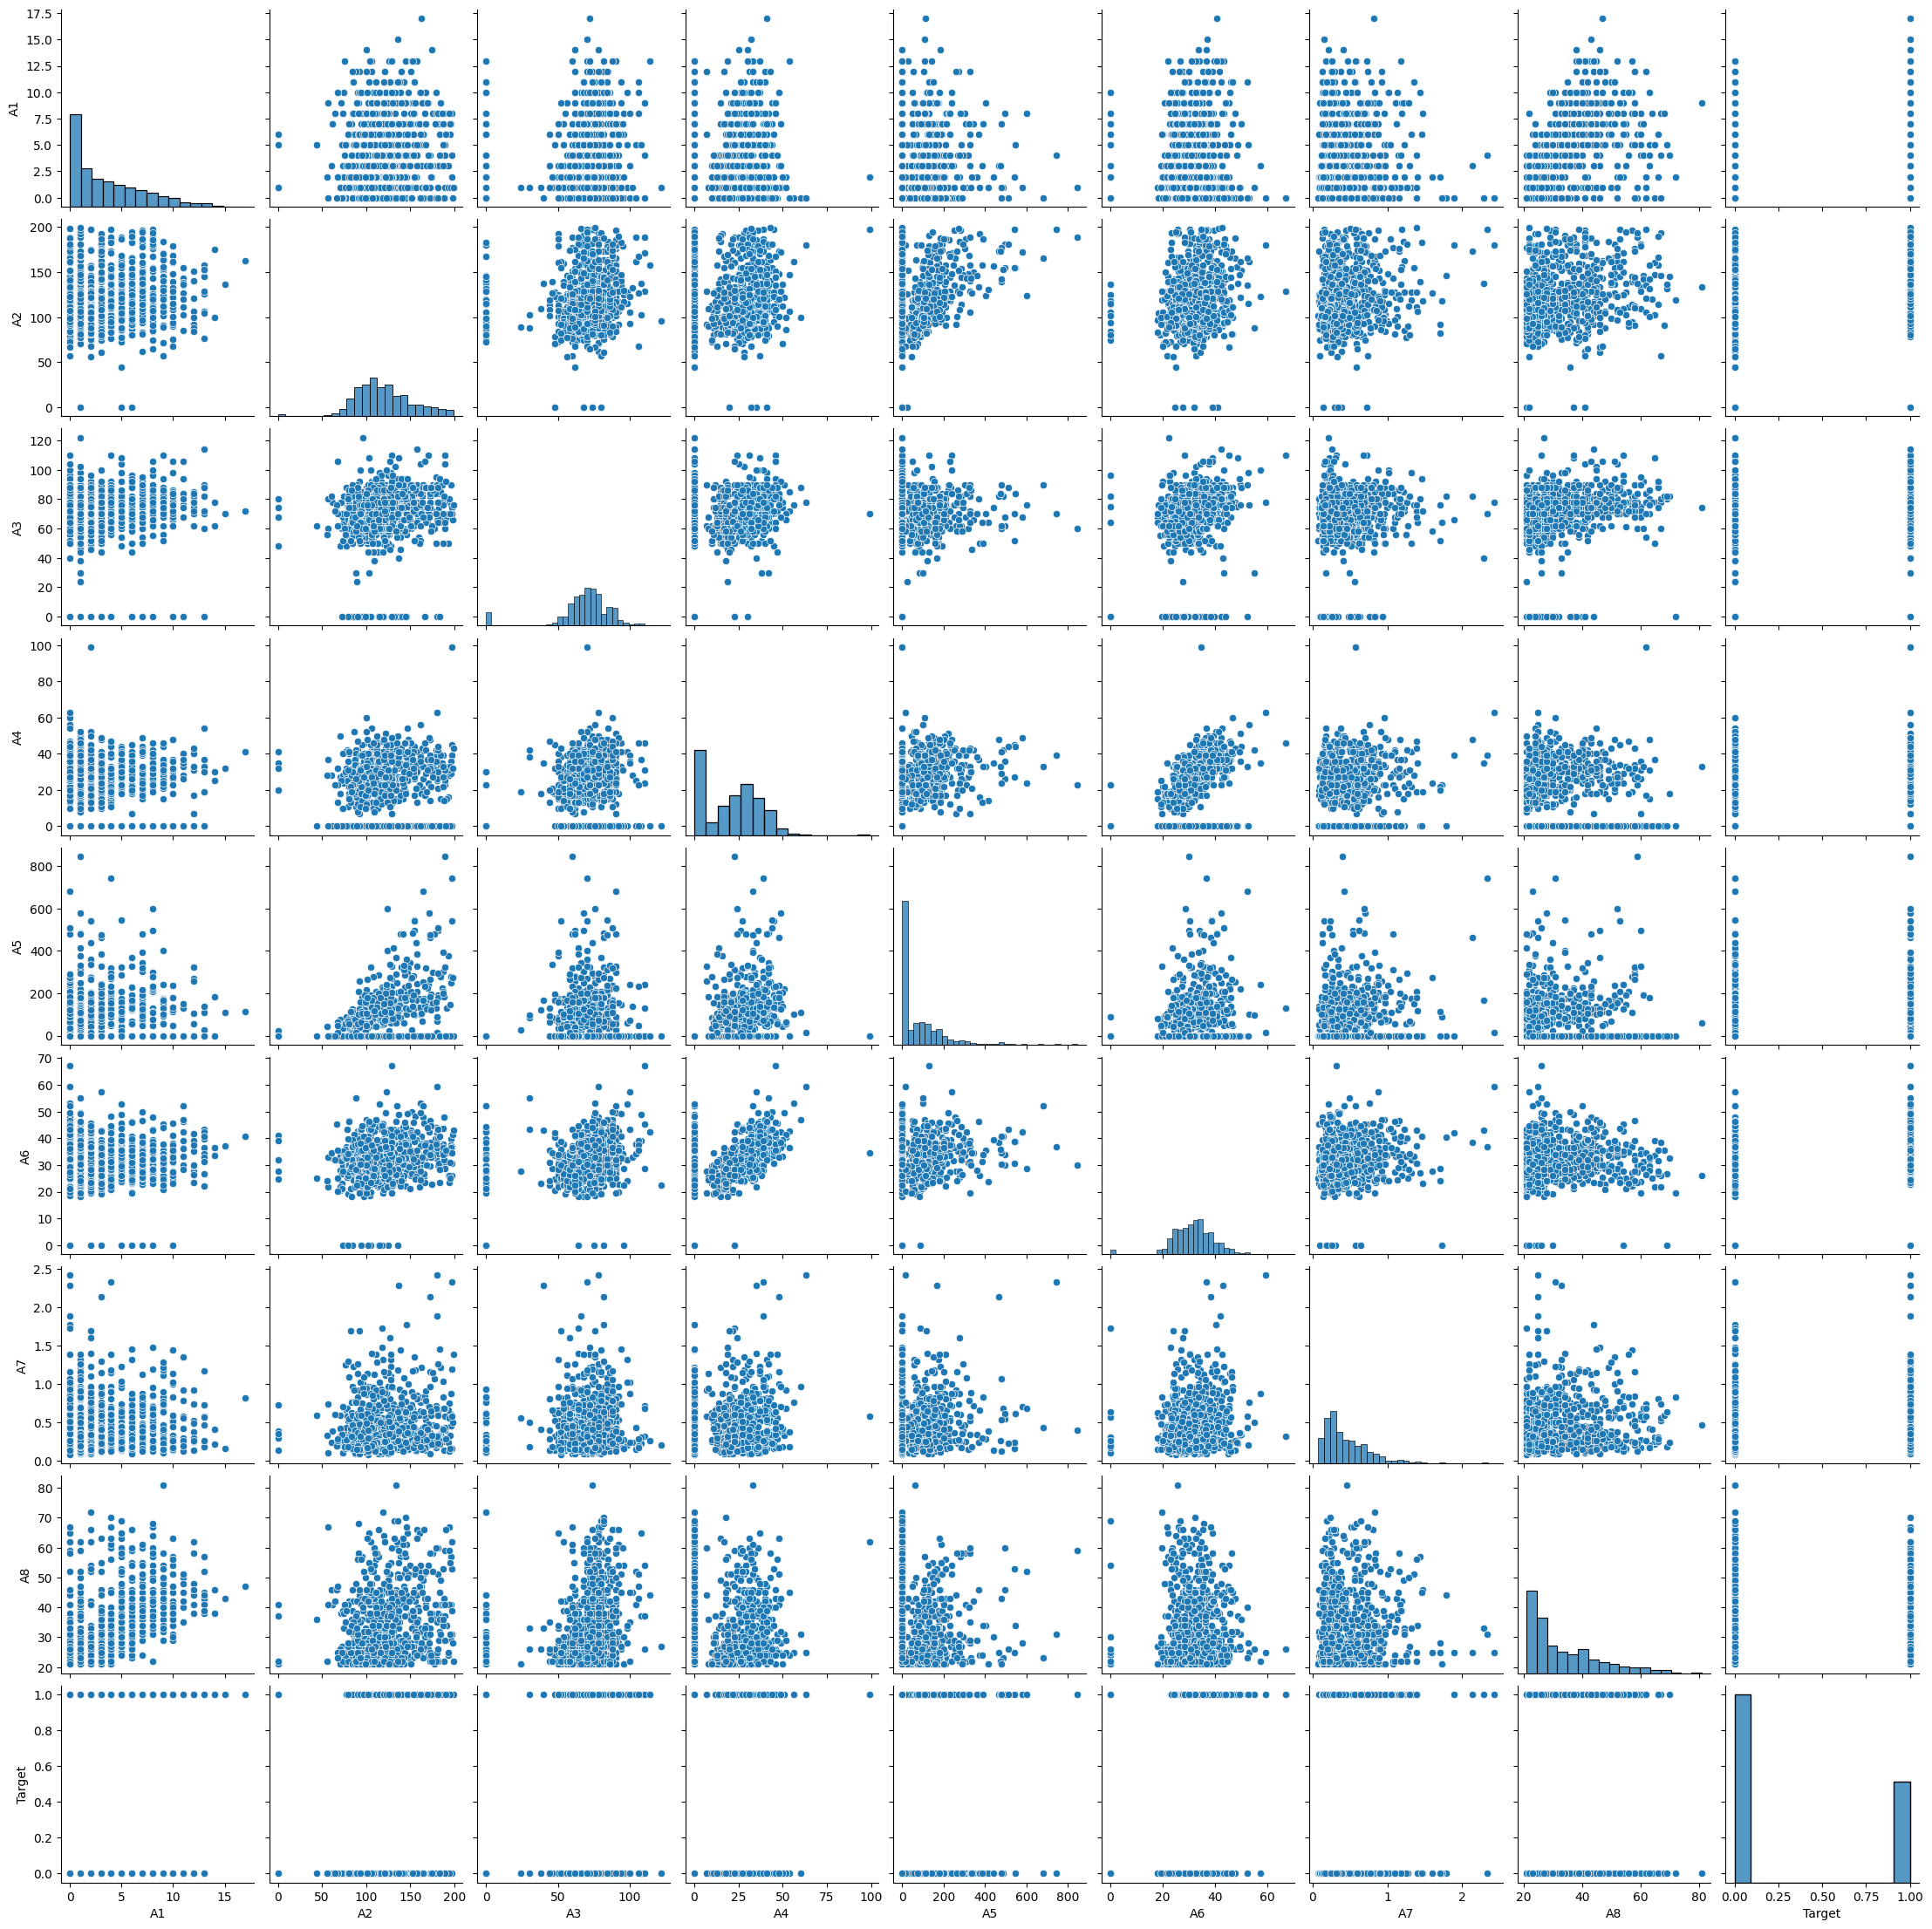

In [3]:
sns.pairplot(df)

In [8]:
df['A2'].skew()

0.17375350179188992

In [9]:
df['A3'].skew()

-1.8436079833551302

In [10]:
df['A6'].skew()

-0.42898158845356543

In [50]:
df1=df[['A1','A2','A3','A4','A5','A7','A8']]
import numpy as np
from sklearn.preprocessing import FunctionTransformer
import pandas as pd
transformer = FunctionTransformer(np.log2,validate=True)
scaled=transformer.transform(df1)
df_scaled=pd.DataFrame(scaled,columns=df1.columns)
print(df_scaled.head())

         A1        A2        A3        A4        A5        A7        A8
0  2.584963  7.209453  6.169925  5.129283      -inf -0.673463  5.643856
1  0.000000  6.409391  6.044394  4.857981      -inf -1.510457  4.954196
2  3.000000  7.515700  6.000000      -inf      -inf -0.573467  5.000000
3  0.000000  6.475733  6.044394  4.523562  6.554589 -2.582080  4.392317
4      -inf  7.098032  5.321928  5.129283  7.392317  1.194087  5.044394


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_function_transformer.py:310: RuntimeWarning: divide by zero encountered in log2
  return func(X, **(kw_args if kw_args else {}))


In [51]:
df_scaled=df_scaled.replace([np.inf,-np.inf],np.nan)
print(df_scaled)

           A1        A2        A3        A4        A5        A7        A8
0    2.584963  7.209453  6.169925  5.129283       NaN -0.673463  5.643856
1    0.000000  6.409391  6.044394  4.857981       NaN -1.510457  4.954196
2    3.000000  7.515700  6.000000       NaN       NaN -0.573467  5.000000
3    0.000000  6.475733  6.044394  4.523562  6.554589 -2.582080  4.392317
4         NaN  7.098032  5.321928  5.129283  7.392317  1.194087  5.044394
..        ...       ...       ...       ...       ...       ...       ...
763  3.321928  6.658211  6.247928  5.584963  7.491853 -2.547932  5.977280
764  1.000000  6.930737  6.129283  4.754888       NaN -1.556393  4.754888
765  2.321928  6.918863  6.169925  4.523562  6.807355 -2.029146  4.906891
766  0.000000  6.977280  5.906891       NaN       NaN -1.518701  5.554589
767  0.000000  6.539159  6.129283  4.954196       NaN -1.666576  4.523562

[768 rows x 7 columns]


In [14]:
df2=df[['A6']]
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()
num_std=std_scaler.fit_transform(df2)
num_std_df=pd.DataFrame(num_std,columns=df2.columns)
num_std_df.head()

,A6
0,0.204013
1,-0.684422
2,-1.103255
3,-0.494043
4,1.409746


In [15]:
std_scaler.mean_

array([31.99257812])

In [14]:
std_scaler.var_

array([62.07904648])

In [55]:
joined_df=pd.concat([df_scaled,num_std_df],axis=1)
joined_df=joined_df.dropna()
joined_df

,A1,A2,A3,A4,A5,A7,A8,A6
3,0.000000,6.475733,6.044394,4.523562,6.554589,-2.582080,4.392317,-0.494043
6,1.584963,6.285402,5.643856,5.000000,6.459432,-2.011588,4.700440,-0.125977
8,1.000000,7.622052,6.129283,5.491853,9.084808,-2.662004,5.727920,-0.189437
13,0.000000,7.562242,5.906891,4.523562,9.724514,-1.329160,5.882643,-0.240205
14,2.321928,7.375039,6.169925,4.247928,7.451211,-0.768568,5.672425,-0.785957
...,...,...,...,...,...,...,...,...
751,0.000000,6.918863,6.285402,5.285402,6.209453,-1.937878,4.807355,0.889377
755,0.000000,7.000000,6.459432,5.285402,6.781360,0.079975,5.209453,0.572079
760,1.000000,6.459432,5.857981,4.700440,4.000000,-0.384584,4.459432,-0.455967
763,3.321928,6.658211,6.247928,5.584963,7.491853,-2.547932,5.977280,0.115169


<Axes: >

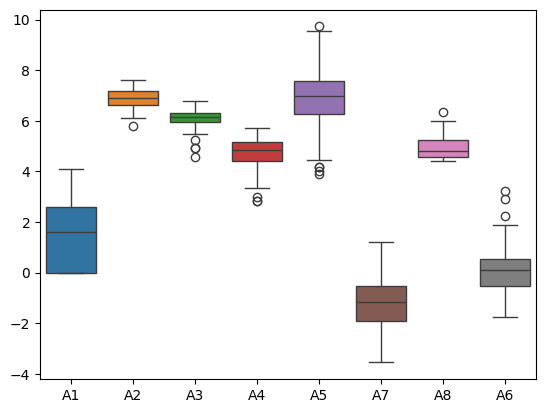

In [56]:
sns.boxplot(joined_df)

In [57]:
q1=joined_df.quantile(0.25)
q3=joined_df.quantile(0.75)
IQR=q3-q1
print(IQR)

A1    2.584963
A2    0.540568
A3    0.331206
A4    0.777608
A5    1.321928
A7    1.360693
A8    0.662965
A6    1.072468
dtype: float64


In [58]:
joined_df=joined_df[~((joined_df>(q3+1.5*IQR))|(joined_df<(q1-1.5*IQR))).any(axis=1)]


<Axes: >

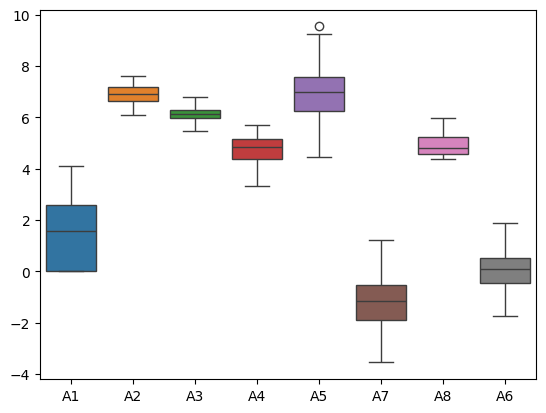

In [59]:
sns.boxplot(joined_df)

In [60]:
joined_df.shape

(320, 8)

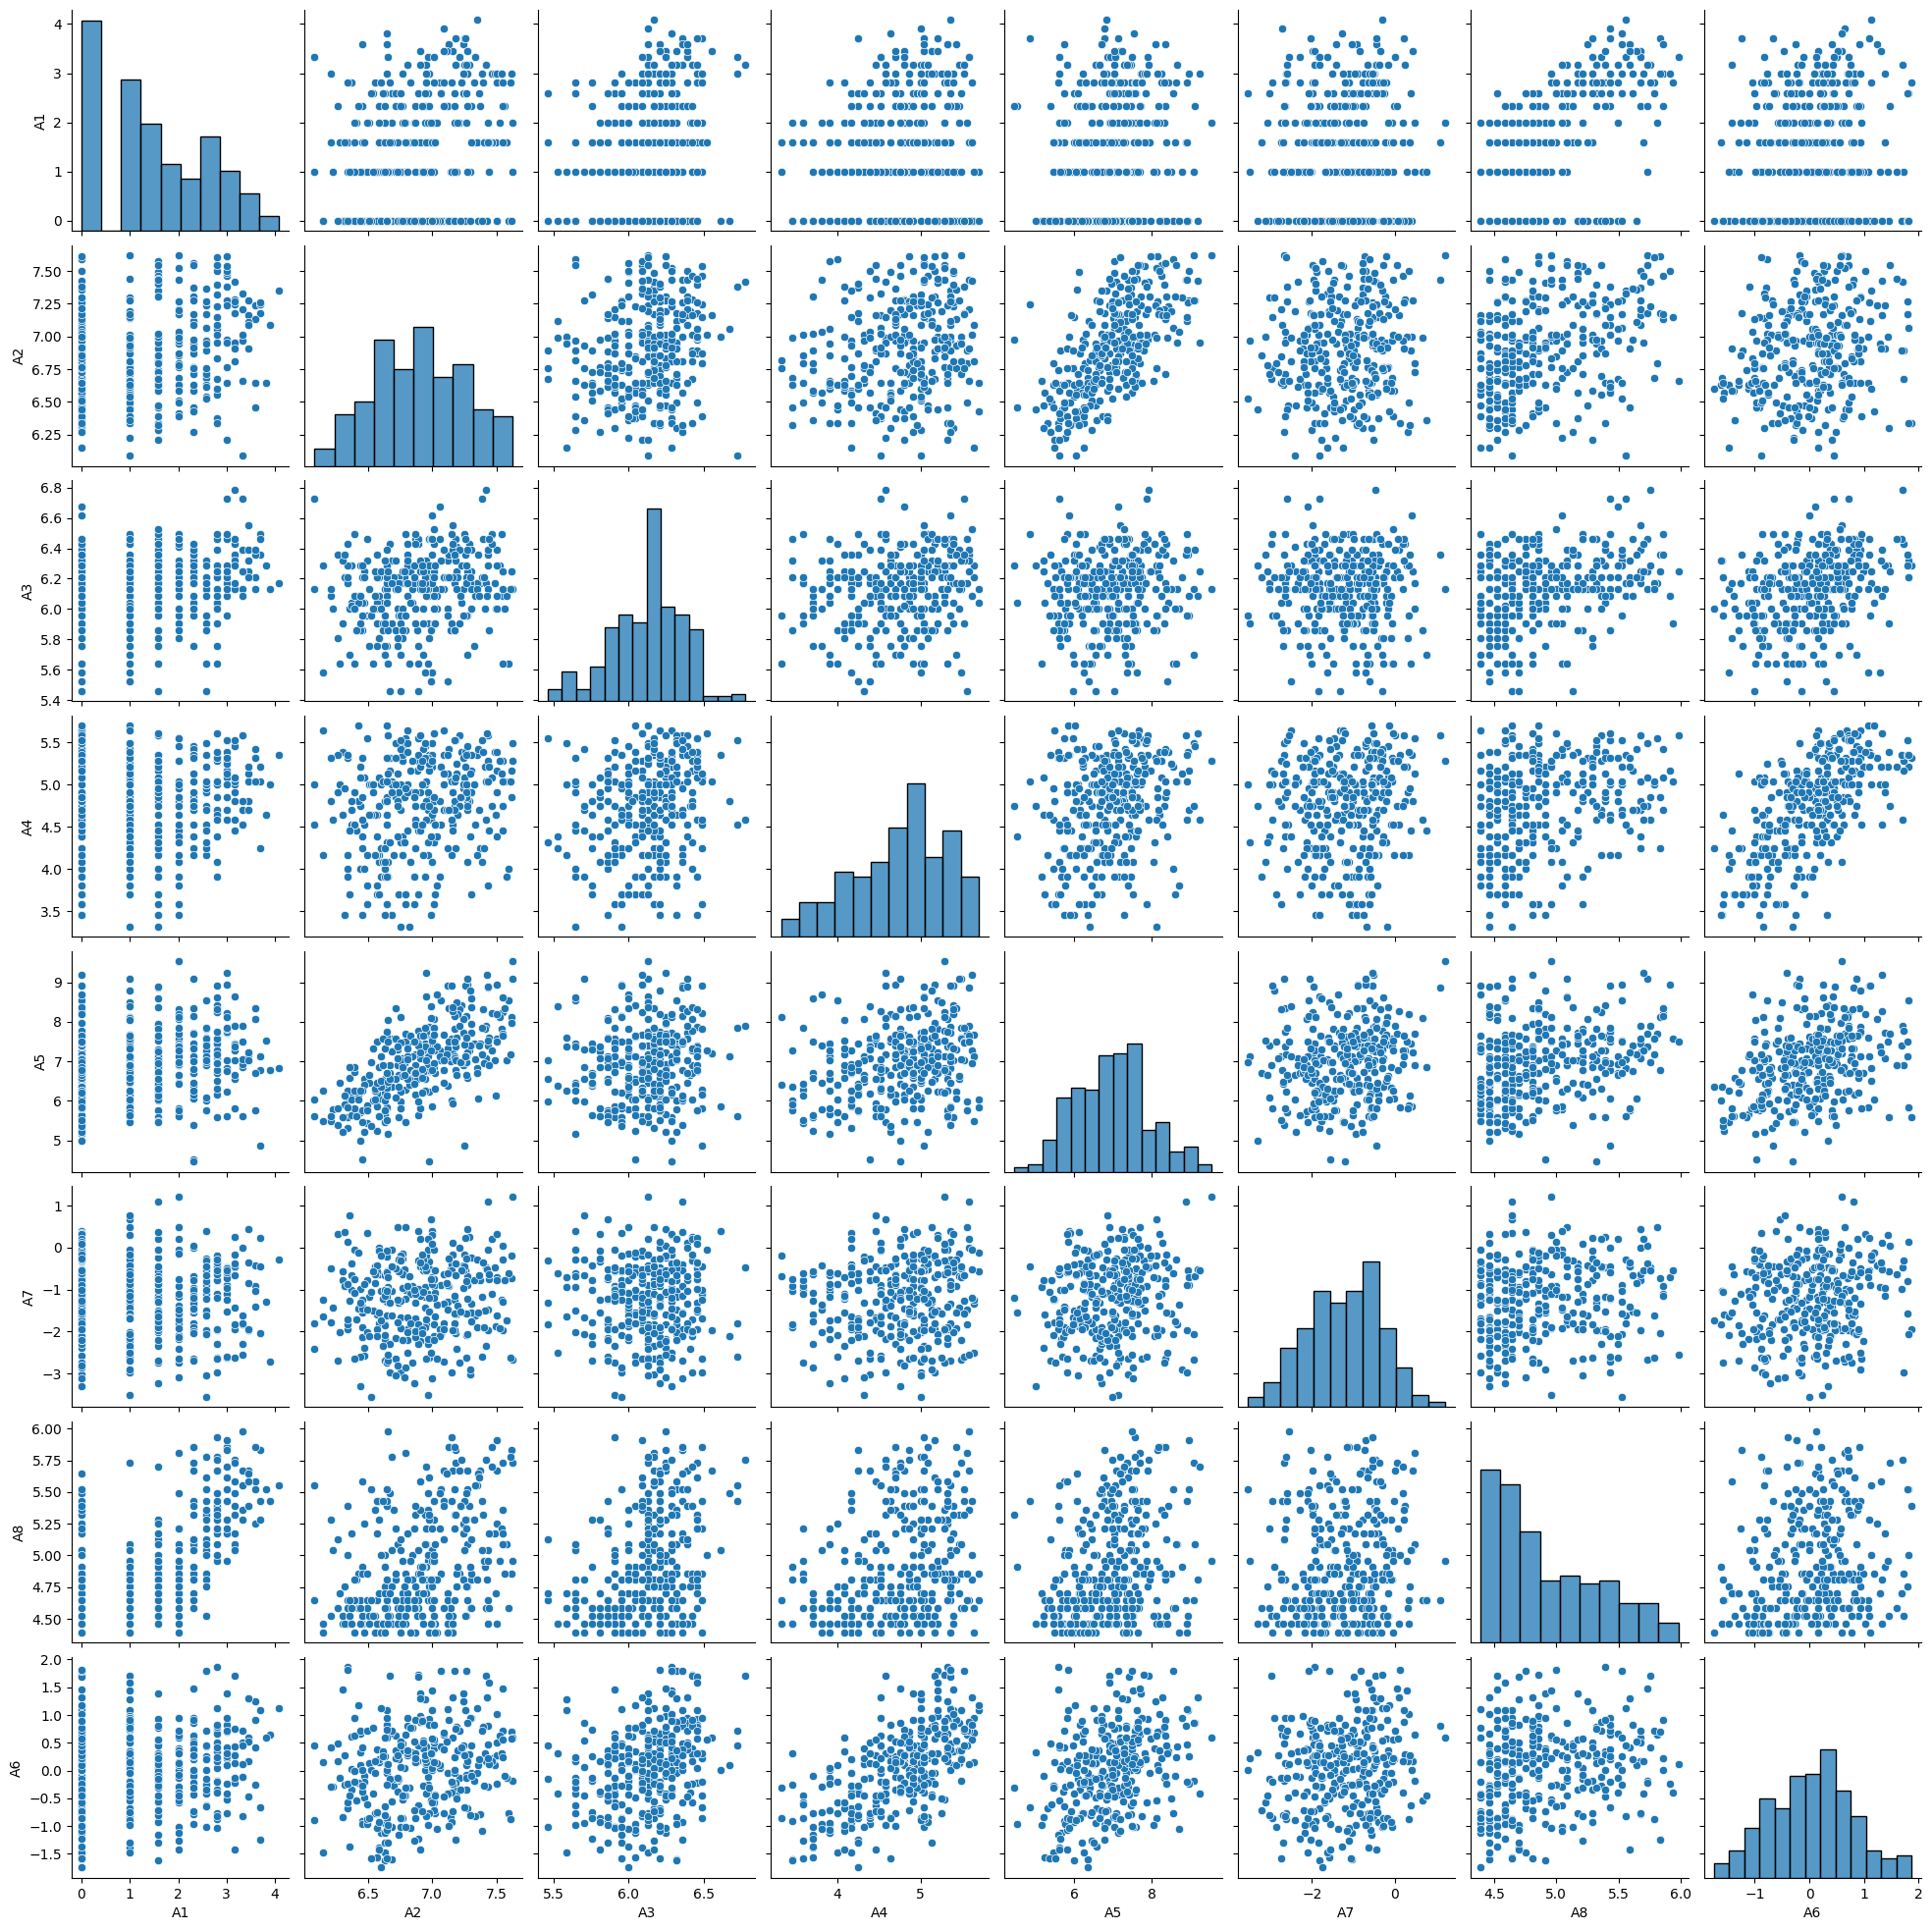

In [61]:
sns.pairplot(joined_df)

In [62]:
print("The mean value of A5 is :",joined_df['A5'].mean())
print("The std deviation of A5 is:",joined_df['A5'].std())
print("The minimum value of A5 is:",joined_df['A5'].min())
print("The maximum value of A5 is:",joined_df['A5'].max())

The mean value of A5 is : 6.965152942344522
The std deviation of A5 is: 0.940665158286053
The minimum value of A5 is: 4.459431618637297
The maximum value of A5 is: 9.539158811108031


In [63]:
print("Upper limit",joined_df['A5'].mean()+2*joined_df['A5'].std())
print("Lower limit",joined_df['A5'].mean()-2*joined_df['A5'].std())

Upper limit 8.846483258916628
Lower limit 5.083822625772417


In [64]:
new_joined_df=joined_df[(joined_df['A5']<8.846)&(joined_df['A5']>-5.083)]
new_joined_df

,A1,A2,A3,A4,A5,A7,A8,A6
3,0.000000,6.475733,6.044394,4.523562,6.554589,-2.582080,4.392317,-0.494043
6,1.584963,6.285402,5.643856,5.000000,6.459432,-2.011588,4.700440,-0.125977
14,2.321928,7.375039,6.169925,4.247928,7.451211,-0.768568,5.672425,-0.785957
19,0.000000,6.845490,6.129283,4.906891,6.584963,-0.918660,5.000000,0.330932
20,1.584963,6.977280,6.459432,5.357552,7.876517,-0.506353,4.754888,0.927452
...,...,...,...,...,...,...,...,...
748,1.584963,7.546894,6.129283,4.459432,7.643856,-1.293359,5.169925,0.559387
751,0.000000,6.918863,6.285402,5.285402,6.209453,-1.937878,4.807355,0.889377
755,0.000000,7.000000,6.459432,5.285402,6.781360,0.079975,5.209453,0.572079
763,3.321928,6.658211,6.247928,5.584963,7.491853,-2.547932,5.977280,0.115169


<Axes: >

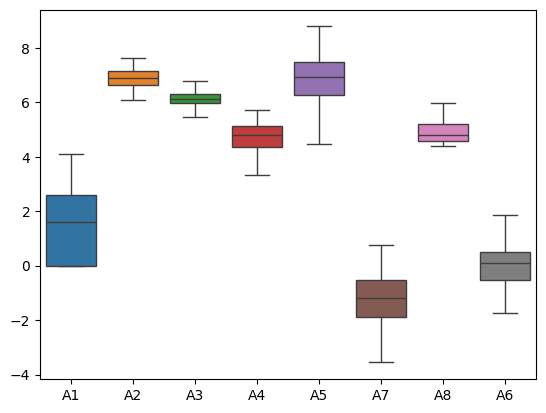

In [65]:
sns.boxplot(new_joined_df)

In [66]:
new_joined_df.isna().sum()

A1    0
A2    0
A3    0
A4    0
A5    0
A7    0
A8    0
A6    0
dtype: int64

In [68]:
df0=df[['Target']]
print(df0)


     Target
0         1
1         0
2         1
3         0
4         1
..      ...
763       0
764       0
765       0
766       1
767       0

[768 rows x 1 columns]


In [72]:
merged_df = pd.merge(new_joined_df,df0, how='inner', left_index=True, right_index=True)
merged_df

,A1,A2,A3,A4,A5,A7,A8,A6,Target
3,0.000000,6.475733,6.044394,4.523562,6.554589,-2.582080,4.392317,-0.494043,0
6,1.584963,6.285402,5.643856,5.000000,6.459432,-2.011588,4.700440,-0.125977,1
14,2.321928,7.375039,6.169925,4.247928,7.451211,-0.768568,5.672425,-0.785957,1
19,0.000000,6.845490,6.129283,4.906891,6.584963,-0.918660,5.000000,0.330932,1
20,1.584963,6.977280,6.459432,5.357552,7.876517,-0.506353,4.754888,0.927452,0
...,...,...,...,...,...,...,...,...,...
748,1.584963,7.546894,6.129283,4.459432,7.643856,-1.293359,5.169925,0.559387,1
751,0.000000,6.918863,6.285402,5.285402,6.209453,-1.937878,4.807355,0.889377,0
755,0.000000,7.000000,6.459432,5.285402,6.781360,0.079975,5.209453,0.572079,1
763,3.321928,6.658211,6.247928,5.584963,7.491853,-2.547932,5.977280,0.115169,0


In [78]:
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.datasets import make_classification

array=merged_df.values
X=array[:,0:8]
Y=array[:,8]
test=SelectKBest(score_func=f_classif,k=4)
fit=test.fit(X,Y)
print(fit.scores_)
features=fit.transform(X)
print(features[0:4,:])

selected_indices = fit.get_support(indices=True)
print("Selected Feature Indices:", selected_indices)

[ 28.69119527 104.76211681  22.90520506  26.87249674  48.64245067
  16.34003389  67.93938164  27.97943571]
[[0.         6.47573343 6.55458885 4.39231742]
 [1.5849625  6.28540222 6.45943162 4.70043972]
 [2.32192809 7.37503943 7.45121111 5.67242534]
 [0.         6.84549005 6.5849625  5.        ]]
Selected Feature Indices: [0 1 4 6]
